# First Name: Caleb
# Last Name: Webster

# Import Libraries  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy

# Import Data

In [2]:
pd.set_option('display.float_format', lambda x:'%.2f'%x)
bottle = pd.read_csv('bottle.csv', low_memory=False)
bottle.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Date,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.65,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.66,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.44,NaN,25.65,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.42,NaN,25.64,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.42,NaN,25.64,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data management 

In [3]:
# Convert all variables to numeric.
bottle["T_degC"] = pd.to_numeric(bottle["T_degC"], errors="coerce")
bottle["O2Sat"] = pd.to_numeric(bottle["O2Sat"], errors="coerce")
bottle["Phaeop"] = pd.to_numeric(bottle["Phaeop"], errors="coerce")

C:\anaconda3\envs\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


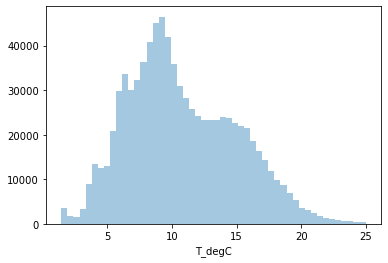

In [4]:
# Obtain subset of temperature up to 25 degrees.
# This limiting is also to cut off outliers.
sub1 = bottle[(bottle["T_degC"] > 0) & (bottle["T_degC"] < 25)].copy()
sns.distplot(sub1["T_degC"].dropna(), kde=False);

C:\anaconda3\envs\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


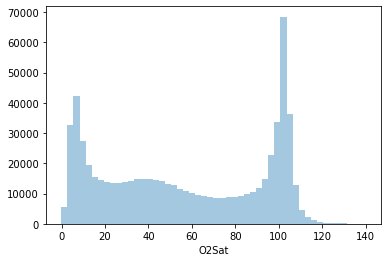

In [5]:
# Obtain subset of oxygen saturation up to 140%.
# This value was chosen because it is the maximum 
# value for which a significant number of records exist, readings above this are considered outliers.
sub2 = sub1[(sub1["O2Sat"] < 140)].copy()
sns.distplot(sub2["O2Sat"].dropna(), kde=False);

C:\anaconda3\envs\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


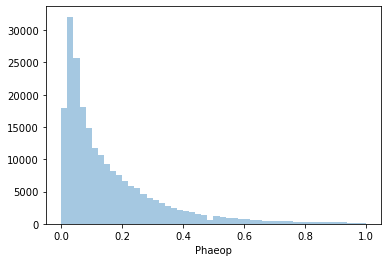

In [6]:
# Obtain subset of phaeophytin concentration between 0 and 1.
# Again, this cutting of values is to reduce outliers.
sub3 = sub2[(sub2["Phaeop"] > 0) & (sub2["Phaeop"] < 1)].copy()
sns.distplot(sub3["Phaeop"].dropna(), kde=False);

In [7]:
# Obtain another subset containing only the required variables and with no null values.
sub4 = sub3[["T_degC", "O2Sat", "Phaeop"]].dropna()

# Correlation between each explantory variable and response variable (y=total_cases)

In [8]:
# There is a strong positive correlation between temperature and oxygen saturation.
print("Association between temperature and oxygen saturation.")
print(scipy.stats.pearsonr(sub4["T_degC"], sub4["O2Sat"]))

Association between temperature and oxygen saturation.
(0.8511370556058719, 0.0)


In [9]:
# There is a weak positive correlation between phaophytin concentration and oxygen saturation.
print("Association between temperature and oxygen saturation.")
print(scipy.stats.pearsonr(sub4["Phaeop"], sub4["O2Sat"]))

Association between temperature and oxygen saturation.
(0.16323799409379602, 0.0)


# Scatter plot between each explantory variable and response variable (y=total_cases)

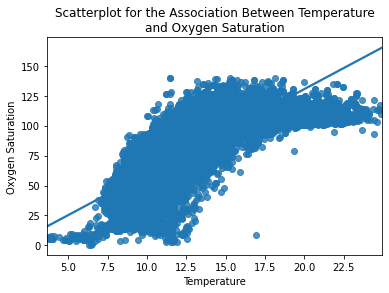

In [10]:
# Scatter plot of correlation between temperature (x) and oxygen saturation (y).
plt.figure()
scat = sns.regplot(x="T_degC", y="O2Sat", fit_reg=True, order=1, data=sub4)
plt.xlabel("Temperature")
plt.ylabel("Oxygen Saturation")
plt.title("Scatterplot for the Association Between Temperature\nand Oxygen Saturation");

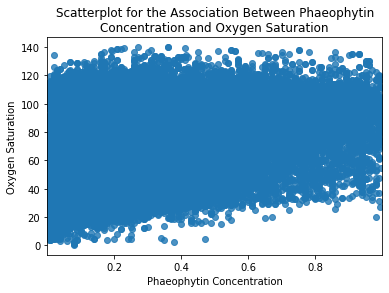

In [11]:
# Scatter plot of correlation between phaeophytin concentration (x) and oxygen saturation (y).
plt.figure()
scat = sns.regplot(x="Phaeop", y="O2Sat", fit_reg=True, data=sub4)
plt.xlabel("Phaeophytin Concentration")
plt.ylabel("Oxygen Saturation")
plt.title("Scatterplot for the Association Between Phaeophytin\nConcentration and Oxygen Saturation");

In [12]:
# Center all variables by subtracting mean values.
sub4["T_degC_c"] = (sub4["T_degC"] - sub4["T_degC"].mean())
sub4["O2Sat_c"] = (sub4["O2Sat"] - sub4["O2Sat"].mean())
sub4["Phaeop_c"] = (sub4["Phaeop"] - sub4["Phaeop"].mean())

# Regression Analysis

In [13]:
# Perform regression analysis of how O2Sat_c is affected by T_degC_c and Phaeop_c.
reg1 = smf.ols("O2Sat_c ~ T_degC_c + Phaeop_c", data=sub4).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                O2Sat_c   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                 3.266e+05
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:46:32   Log-Likelihood:            -8.5234e+05
No. Observations:              215536   AIC:                         1.705e+06
Df Residuals:                  215533   BIC:                         1.705e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.612e-13      0.027  -3.17e-11      1.0

In [14]:
# R-squared: 0.752
# p-value: 0.0
# equation: O2Sat_c = -8.618e-13 + 7.0153(T_degC_c) + 25.5296(Phaeop_c)

# qq plot 

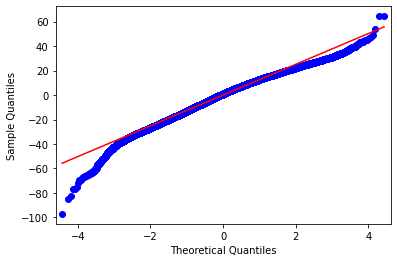

In [15]:
# qqplot of regression analysis.
# The points fit the line well for -2 < x < 2.
import statsmodels.api as sm
fig1 = sm.qqplot(reg1.resid, line="r")

# standardized residual plots

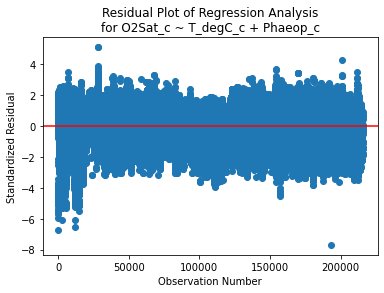

In [16]:
# Residual plot of regression analysis. 
# The points appear to be evenly distributed above and below zero.
stdres = pd.DataFrame(reg1.resid_pearson)

plt.figure()
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.title("Residual Plot of Regression Analysis\nfor O2Sat_c ~ T_degC_c + Phaeop_c");

In [17]:
# Calculate percentage of residuals with more than 2 standard deviation.
# Value is < 5%, which is the maximum that can be considered a good fit.
percentage_over2sd = (np.count_nonzero( stdres[0] > 2) + np.count_nonzero( stdres[0] < -2))/len(stdres)*100
print (percentage_over2sd)

3.9250983594387945


In [18]:
# Calculate percentage of residuals with more than 2.5 standard deviation.
# Value is < 1%, which is the maximum that can be considered a good fit.
percentage_over2_5sd = (np.count_nonzero( stdres[0] > 2.5) + np.count_nonzero( stdres[0] < -2.5))/len(stdres)*100
print (percentage_over2_5sd)

0.9965852572192115
